In [1]:
import torch
import torch.nn as nn

### Generate Tensor

In [2]:
rows, cols = 13, 13
t = torch.full(size=(rows, cols), fill_value=4)
t

tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [3]:
t[:, 1] += 1
t[:, cols//2:(cols+1)//2] += 1
t[:, -2] += 1

t[1, :] += 1
t[rows//2: (rows+1)//2] += 1
t[-2, :] += 1

In [4]:
t[1, [1, cols//2, -2]] -= 1
t[rows//2, [1, cols//2, -2]] -= 1
t[-2, [1, cols//2, -2]] -= 1
t

tensor([[4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4]])

In [5]:
t[3:5, 3:5] += 2
t[3:5, 8:10] += 2
t[8:10, 3:5] += 2
t[8:10, 8:10] += 2
t

tensor([[4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 6, 6, 4, 5, 4, 6, 6, 4, 5, 4],
        [4, 5, 4, 6, 6, 4, 5, 4, 6, 6, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [4, 5, 4, 6, 6, 4, 5, 4, 6, 6, 4, 5, 4],
        [4, 5, 4, 6, 6, 4, 5, 4, 6, 6, 4, 5, 4],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4]])

### Softmax

In [6]:
t1 = torch.randn((5, ))
print(t1)

# sigmoid
print(torch.sigmoid(t1))

# softmax
sfmx = nn.Softmax(dim=0)
print(sfmx(t1))

tensor([-0.0719,  0.4661,  0.0264, -0.8464, -0.4479])
tensor([0.4820, 0.6145, 0.5066, 0.3002, 0.3899])
tensor([0.2015, 0.3450, 0.2223, 0.0929, 0.1383])


### Perceptron convergence verfication

In [7]:
# dataset

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [8]:
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon


# check linearly separable
def is_linearly_separable(pos_class, neg_class):

  pos_hull = ConvexHull(pos_class)
  neg_hull = ConvexHull(neg_class)
  return not Polygon(pos_hull.points).intersects(Polygon(neg_hull.points))


# create binary, linearly separable dataset (2D or 3D)
def create_dataset(init_centers=[(1, 1), (2, 2)], class_std=1, samples=25):

  dim = len(init_centers[0])
  x, y = make_blobs(n_samples=samples, n_features=dim, centers=init_centers, cluster_std=class_std)
  if not is_linearly_separable(x[y==0], x[y==1]):
    print("not linearly separable!")
    x, y = create_dataset(init_centers=init_centers, class_std=class_std - 0.1, samples=samples)
  return x, y


# perceptron algorithm
def perceptron(x, y):

  # augment 1s in x
  x = torch.cat((torch.ones((x.shape[0], 1)), torch.from_numpy(x)), dim=1)
  # initial weight
  w = torch.randn((x.shape[1], ), dtype=float)
  k = 0

  # check for errors
  while True:
    for xn, yn in zip(x, y):
      if yn * torch.dot(w, xn) <= 0:
        k += 1
        w += yn * xn
        break
    else:
      break
  
  return w, k

In [9]:
# trying data clusters close and far, i.e. narrow and wide margins
x, y = create_dataset([[1, 1, 1], [3, 3, 3]])
x1, y1 = create_dataset([[1, 1, 1], [11, 11, 11]])

# change 0 labels to -1
y[y==0] = -1
y1[y1==0] = -1
print(x.shape, y.shape)
print(x1.shape, y1.shape)

(25, 3) (25,)
(25, 3) (25,)


In [10]:
# R & gamma

for f, l in [(x, y), (x1, y1)]:
  R = 0
  for xn in f:
    nrm = torch.linalg.vector_norm(torch.from_numpy(xn))
    R = max(R, nrm.item())
  print("R: ", R)

  svm = LinearSVC(C=1000, loss="hinge", tol=1e-5, random_state=0)
  svm.fit(f, l)
  gamma = 1 / torch.linalg.vector_norm(torch.from_numpy(svm.coef_)).item()
  print("gamma: ", gamma)

  print("Bound: ", 4*(R**2)/(gamma**2))

R:  6.499045858328029
gamma:  0.6095724978390237
Bound:  454.6827362468745
R:  21.5528687008721
gamma:  6.300462174117799
Bound:  46.808566445704656


/home/sanjiv/miniconda3/envs/deepl/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sanjiv/miniconda3/envs/deepl/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sanjiv/miniconda3/envs/deepl/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sanjiv/miniconda3/envs/deepl/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# narrow margin

ks = []
for _ in range(250):
  ks.append(perceptron(x, y)[1])

print("Max adjustments required for perceptron convergence: ", max(ks))

Max adjustments required for perceptron convergence:  128


In [12]:
# wide margin

ks = []
for _ in range(250):
  ks.append(perceptron(x1, y1)[1])

print("Max adjustments required for perceptron convergence: ", max(ks))

Max adjustments required for perceptron convergence:  31


#### MNIST

In [17]:
import torchvision
import matplotlib.pyplot as plt

In [ ]:
mnist = torchvision.datasets.MNIST('./data', download=True)

In [20]:
dx = mnist.data
dy = mnist.targets

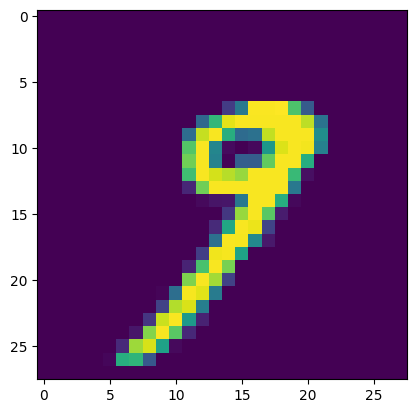

In [38]:
fig, ax = plt.subplots()
ax.imshow(dx[33])

In [65]:
# convert to 0 vs. 1 problem

zero_one_ids = dy < 2
nx = dx[zero_one_ids]
ny = dy[zero_one_ids]
ny[ny==0] = -1
nx = nx.reshape((nx.shape[0], -1))

In [66]:
nx.shape

torch.Size([12665, 784])

In [85]:
# add ones

nx = torch.cat(( torch.ones((nx.shape[0], 1)), nx ), dim=1)
nx.shape

torch.Size([12665, 785])

In [80]:
nx = nx.to(dtype=float)
nx.dtype

torch.float64

In [75]:
fw, k = perceptron(nx.numpy(), ny)

In [79]:
fw.shape, k

(torch.Size([785]), 246)

In [87]:
# accuracy on the training data

fw = fw.reshape((fw.numel(), 1))
preds = torch.matmul(nx, fw)
preds.shape

torch.Size([12665, 1])

In [94]:
preds = preds.reshape((ny.shape[0], ))
preds.shape

torch.Size([12665])

In [99]:
preds[preds < 0] = -1
preds[preds > 0] = 1
preds.unique()

tensor([-1.,  1.], dtype=torch.float64)

In [100]:
from sklearn.metrics import accuracy_score

accuracy_score(ny.numpy(), preds.numpy())

1.0

In [139]:
# now trying the weights from perceptron on test data

# load test data
mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data
y_test = mnist_test.targets

In [140]:
dx.shape, dy.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [141]:
zero_one_ids_test = y_test < 2
dx_test = x_test[zero_one_ids_test]
dy_test = y_test[zero_one_ids_test]
dy_test[dy_test==0] = -1

In [142]:
# test set length
sum(zero_one_ids_test)

tensor(2115)

In [143]:
dx_test = dx_test.reshape((dx_test.shape[0], -1))
print(dx_test.shape)
dx_test = torch.cat( (torch.ones((dx_test.shape[0], 1)), dx_test), dim=1)
dx_test.shape

torch.Size([2115, 784])


torch.Size([2115, 785])

In [144]:
dx_test = dx_test.to(dtype=float)
dx_test.dtype

torch.float64

In [145]:
# check the classification error on test data

preds_test = torch.matmul(dx_test, fw)
preds_test = preds_test.reshape((preds_test.shape[0], ))
preds_test.shape

torch.Size([2115])

In [146]:
preds_test[preds_test < 0] = -1
preds_test[preds_test > 0] = 1
preds_test.unique()

tensor([-1.,  1.], dtype=torch.float64)

In [147]:
accuracy_score(dy_test.numpy(), preds_test.numpy())

0.9990543735224586

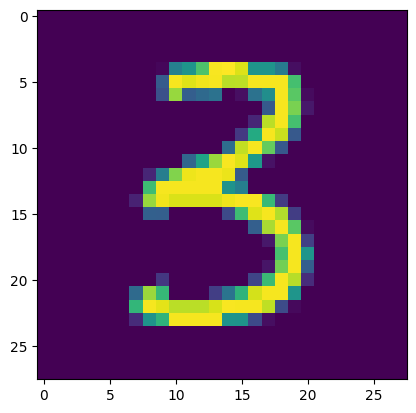

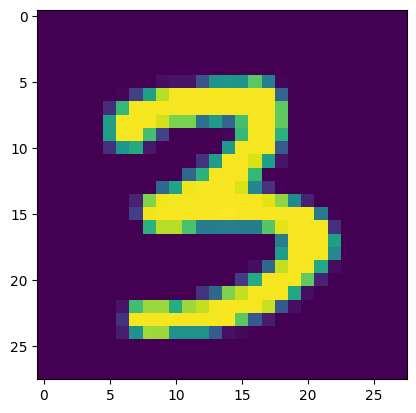

In [149]:
# show the misclassified instances

errors = dy_test * preds_test < 0
error_ids = []
for i, ele in enumerate(errors):
    if ele:
        error_ids.append(i)

for i in error_ids:
    fig, ax = plt.subplots()
    ax.imshow(x_test[i])